In [1]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array,array_to_img,load_img
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [2]:
import tensorflow as tf

In [3]:
data= 'G:\Al_Sparrow\my_image'

In [4]:
data

'G:\\Al_Sparrow\\my_image'

In [5]:
import os

In [6]:
train_dir = os.path.join(data,'train')

In [7]:
train_dir

'G:\\Al_Sparrow\\my_image\\train'

In [8]:
validation_dir = os.path.join(data,'validation')

In [9]:
validation_dir

'G:\\Al_Sparrow\\my_image\\validation'

In [10]:
train_aashima_dir = os.path.join(train_dir,'Aashima')
train_jaheen_dir = os.path.join(train_dir,'Jaheen')

In [11]:
validation_aashima_dir = os.path.join(validation_dir,'Aashima')
validation_jaheen_dir = os.path.join(validation_dir,'Jaheen')

In [12]:
len(os.listdir(train_aashima_dir))

35

In [13]:
IMAGE_SIZE = [224,224]

In [14]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3],weights='imagenet',include_top=False)

In [15]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [16]:
for layer in vgg.layers:
    layer.trainable = False

In [17]:
x = Flatten()(vgg.output)
prediction = Dense(1,activation='sigmoid')(x)

In [18]:
model = Model(inputs=vgg.input,outputs=prediction)

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [20]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [22]:
IMG_HIEGHT=224
IMG_WIDHT=224

In [23]:
train_data_gen= train_image_generator.flow_from_directory(directory=train_dir,
                                                           shuffle=True,
                                                          batch_size=5,
                                                           target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                           class_mode='binary')

Found 70 images belonging to 2 classes.


In [24]:
train_data_gen.class_indices

{'Aashima': 0, 'Jaheen': 1}

In [25]:
val_data_gen = validation_image_generator.flow_from_directory(directory=validation_dir,
                                                              target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                              batch_size=5,
                                                              class_mode='binary')

Found 30 images belonging to 2 classes.


In [26]:
history = model.fit(train_data_gen,epochs=8, validation_data=val_data_gen)

Epoch 1/8
14/14 [==============================] - 44s 3s/step - loss: 0.5313 - accuracy: 0.7143 - val_loss: 0.2285 - val_accuracy: 0.9333
Epoch 2/8
14/14 [==============================] - 39s 3s/step - loss: 0.0639 - accuracy: 0.9857 - val_loss: 0.1423 - val_accuracy: 0.9667
Epoch 3/8
14/14 [==============================] - 38s 3s/step - loss: 0.0205 - accuracy: 1.0000 - val_loss: 0.1622 - val_accuracy: 0.9667
Epoch 4/8
14/14 [==============================] - 38s 3s/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.1536 - val_accuracy: 0.9667
Epoch 5/8
14/14 [==============================] - 39s 3s/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.1249 - val_accuracy: 0.9667
Epoch 6/8
14/14 [==============================] - 37s 3s/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.1446 - val_accuracy: 0.9667
Epoch 7/8
14/14 [==============================] - 38s 3s/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.1439 - val_accuracy: 0.9667
Epoch 8/8
14/14 [==========

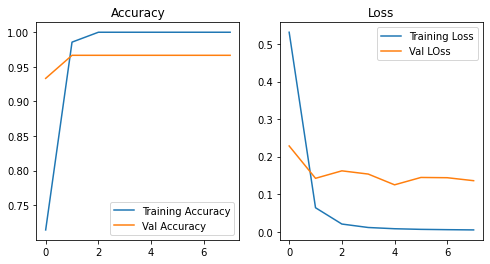

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(8)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Val LOss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

In [28]:
test=load_img('test_img.jpg',target_size=(224,224))

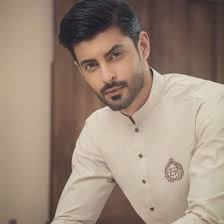

In [29]:
test

In [30]:
test_array = img_to_array(test)

In [31]:
test_array.shape

(224, 224, 3)

In [32]:
test_array = test_array.reshape(1,224,224,3)

In [33]:
model.predict(test_array)

array([[1.]], dtype=float32)

In [34]:
class_name = ['Aashima','Jaheen']
#testing cascad
import cv2
import numpy as np
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
font = cv2.FONT_HERSHEY_SIMPLEX
# To capture video from webcam. 
cap = cv2.VideoCapture(0)
# To use a video file as input 
# cap = cv2.VideoCapture('filename.mp4')
while True:
    # Read the frame
    _, img = cap.read()

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    test = img
    test = cv2.resize(test,(224,224))
    test = test.reshape(1,224,224,3)
    iden = []
    pred = model.predict(test)
    iden.append(int(pred[0][0]))
    print(iden)
    

    # Detect the faces
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    #print(faces.shape)
    # Draw the rectangle around each face
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(img, str(class_name[int(pred[0][0])]), (x+5,y-5), font, 1, (255,0,0), 4)

    # Display
    cv2.imshow('img', img)

    # Stop if escape key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
# Release the VideoCapture object
cap.release()
cv2.destroyAllWindows()

[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[0]
[1]
[1]
[1]
